In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:

# Load dataset
df = pd.read_csv("custom_dataset_large.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

   Age  Salary  Experience Education Level      City Purchased
0   56   28392          36      Bachelor's   Houston       Yes
1   46   50535          31     High School  New York       Yes
2   32   98603          32        Master's   Houston       Yes
3   25   72256           0      Bachelor's   Chicago       Yes
4   38  109135          18             PhD   Houston       Yes
Age                0
Salary             0
Experience         0
Education Level    0
City               0
Purchased          0
dtype: int64


In [19]:

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Education Level', 'City', 'Purchased']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [20]:
# Splitting data
X = df.drop(columns=['Purchased'])  # Features
y = df['Purchased']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scaling numerical features
scaler = StandardScaler()
X_train[['Age', 'Salary', 'Experience']] = scaler.fit_transform(X_train[['Age', 'Salary', 'Experience']])
X_test[['Age', 'Salary', 'Experience']] = scaler.transform(X_test[['Age', 'Salary', 'Experience']])

In [ ]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20



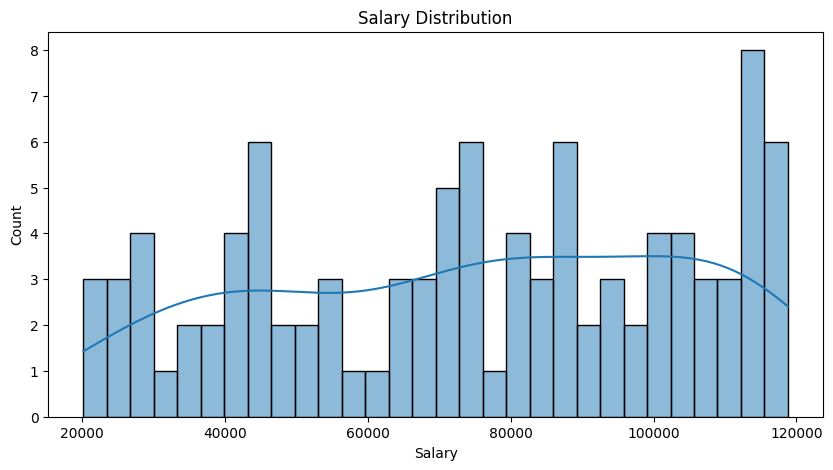

In [24]:

# Visualization - Univariate Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

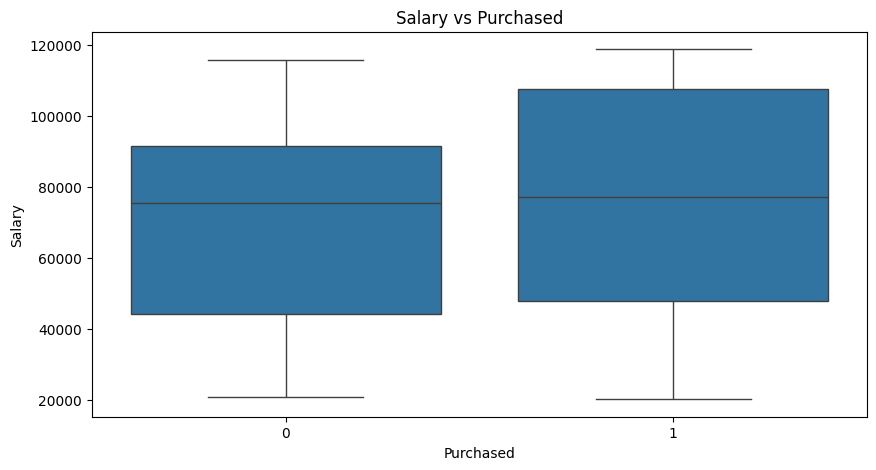

In [25]:

# Visualization - Bivariate Analysis
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Purchased'], y=df['Salary'])
plt.title("Salary vs Purchased")
plt.show()

In [26]:

# User Prediction Function
def predict_purchase():
    age = int(input("Enter Age: "))
    salary = float(input("Enter Salary: "))
    experience = int(input("Enter Experience (Years): "))
    education = input("Enter Education Level (High School/Bachelor's/Master's/PhD): ")
    city = input("Enter City (Houston/New York/Chicago/Los Angeles/Miami): ")
    
    education_encoded = label_encoders['Education Level'].transform([education])[0]
    city_encoded = label_encoders['City'].transform([city])[0]
    
    input_data = np.array([[age, salary, experience, education_encoded, city_encoded]])
    input_data[:, :3] = scaler.transform(input_data[:, :3])
    
    prediction = model.predict(input_data)
    result = "Yes" if prediction[0] == 1 else "No"
    print("Prediction: Will the customer purchase?", result)

# Run Prediction
predict_purchase()


Prediction: Will the customer purchase? Yes


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
